# Notebook 12: Model Comparison
## Stanford TECH 27 Final Project

This notebook compares all 8 models trained in notebooks 06-11.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

## 2. Load Model Results

In [2]:
OUTPUT_DIR = Path('processed_data')

# Load results from saved pickle files where available
results = {}

# Load CNN results
if (OUTPUT_DIR / '1d_cnn_results.pkl').exists():
    with open(OUTPUT_DIR / '1d_cnn_results.pkl', 'rb') as f:
        cnn_results = pickle.load(f)
        results['1D CNN'] = cnn_results['metrics']
        
# Load LSTM results
if (OUTPUT_DIR / 'lstm_results.pkl').exists():
    with open(OUTPUT_DIR / 'lstm_results.pkl', 'rb') as f:
        lstm_results = pickle.load(f)
        results['LSTM'] = lstm_results['metrics']
        
# Load GRU results
if (OUTPUT_DIR / 'gru_results.pkl').exists():
    with open(OUTPUT_DIR / 'gru_results.pkl', 'rb') as f:
        gru_results = pickle.load(f)
        results['GRU'] = gru_results['metrics']

# Load CatBoost results
if (OUTPUT_DIR / 'catboost_results.pkl').exists():
    with open(OUTPUT_DIR / 'catboost_results.pkl', 'rb') as f:
        catboost_results = pickle.load(f)
        results['CatBoost'] = {
            'train': catboost_results['train_metrics'],
            'val': catboost_results['val_metrics'],
            'test': catboost_results['test_metrics']
        }

# Load CatBoost NoTime results
if (OUTPUT_DIR / 'catboost_notime_results.pkl').exists():
    with open(OUTPUT_DIR / 'catboost_notime_results.pkl', 'rb') as f:
        catboost_notime_results = pickle.load(f)
        results['CatBoost NoTime'] = {
            'train': catboost_notime_results['train_metrics'],
            'val': catboost_notime_results['val_metrics'],
            'test': catboost_notime_results['test_metrics']
        }

# Manually add results from notebooks 06 (from final outputs)
results['Linear Regression'] = {
    'train': {'r2': 0.707273, 'rmse_percent': 12.307, 'mae_percent': 9.286},
    'val': {'r2': 0.681047, 'rmse_percent': 12.132, 'mae_percent': 8.282},
    'test': {'r2': 0.208879, 'rmse_percent': 19.756, 'mae_percent': 10.851}
}

results['Random Forest'] = {
    'train': {'r2': 0.999856, 'rmse_percent': 0.273, 'mae_percent': 0.121},
    'val': {'r2': 0.871024, 'rmse_percent': 7.715, 'mae_percent': 5.395},
    'test': {'r2': 0.917825, 'rmse_percent': 6.367, 'mae_percent': 4.663}
}

results['XGBoost'] = {
    'train': {'r2': 0.960371, 'rmse_percent': 4.528, 'mae_percent': 3.029},
    'val': {'r2': 0.864056, 'rmse_percent': 7.921, 'mae_percent': 5.790},
    'test': {'r2': 0.904824, 'rmse_percent': 6.852, 'mae_percent': 5.159}
}

print("Loaded results for:", list(results.keys()))

Loaded results for: ['1D CNN', 'LSTM', 'GRU', 'CatBoost', 'CatBoost NoTime', 'Linear Regression', 'Random Forest', 'XGBoost']


## 3. Create Comparison DataFrame

In [3]:
# Create comparison dataframe
comparison_data = []

for model_name, metrics in results.items():
    # Handle different metric formats
    if 'train' in metrics:
        train_r2 = metrics['train'].get('r2', 0)
        train_rmse = metrics['train'].get('rmse_percent', metrics['train'].get('rmse', 0))
        train_mae = metrics['train'].get('mae_percent', metrics['train'].get('mae', 0))
        
        val_r2 = metrics['val'].get('r2', 0)
        val_rmse = metrics['val'].get('rmse_percent', metrics['val'].get('rmse', 0))
        val_mae = metrics['val'].get('mae_percent', metrics['val'].get('mae', 0))
        
        test_r2 = metrics['test'].get('r2', 0)
        test_rmse = metrics['test'].get('rmse_percent', metrics['test'].get('rmse', 0))
        test_mae = metrics['test'].get('mae_percent', metrics['test'].get('mae', 0))
    else:
        # Format for non-nested dictionaries
        train_r2 = metrics.get('train_r2', 0)
        train_rmse = metrics.get('train_rmse', 0)
        train_mae = metrics.get('train_mae', 0)
        
        val_r2 = metrics.get('val_r2', 0)
        val_rmse = metrics.get('val_rmse', 0)
        val_mae = metrics.get('val_mae', 0)
        
        test_r2 = metrics.get('test_r2', 0)
        test_rmse = metrics.get('test_rmse', 0)
        test_mae = metrics.get('test_mae', 0)
    
    comparison_data.append({
        'Model': model_name,
        'Train R²': train_r2,
        'Train RMSE (%)': train_rmse,
        'Train MAE (%)': train_mae,
        'Val R²': val_r2,
        'Val RMSE (%)': val_rmse,
        'Val MAE (%)': val_mae,
        'Test R²': test_r2,
        'Test RMSE (%)': test_rmse,
        'Test MAE (%)': test_mae
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

print("\nModel Performance Summary (sorted by Test R²):")
print(comparison_df[['Model', 'Test R²', 'Test RMSE (%)', 'Test MAE (%)']].round(3).to_string(index=False))


Model Performance Summary (sorted by Test R²):
            Model  Test R²  Test RMSE (%)  Test MAE (%)
         CatBoost    0.977          3.379         2.234
  CatBoost NoTime    0.938          5.520         4.034
    Random Forest    0.918          6.367         4.663
          XGBoost    0.905          6.852         5.159
           1D CNN    0.799          9.958         7.366
              GRU    0.343         18.006        14.769
             LSTM    0.331         18.170        14.224
Linear Regression    0.209         19.756        10.851


## 4. Performance Visualization

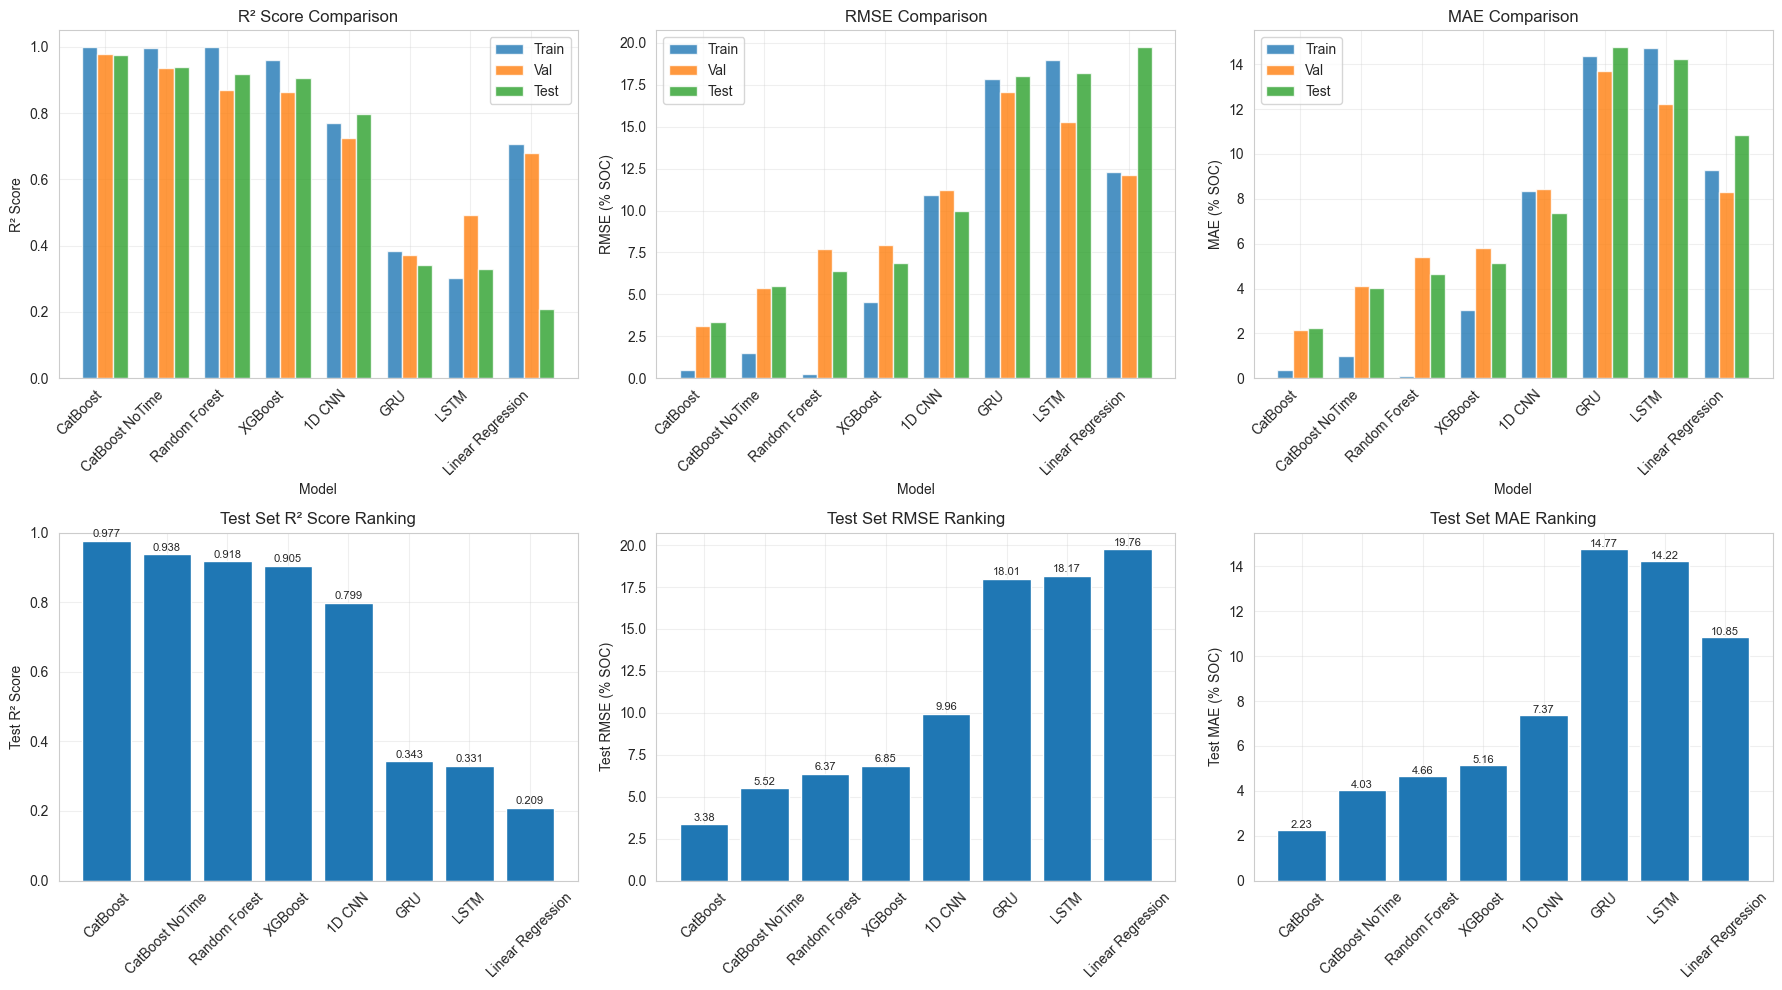

In [4]:
# Create performance comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# R² Comparison
ax = axes[0, 0]
x_pos = np.arange(len(comparison_df))
width = 0.25

ax.bar(x_pos - width, comparison_df['Train R²'], width, label='Train', alpha=0.8)
ax.bar(x_pos, comparison_df['Val R²'], width, label='Val', alpha=0.8)
ax.bar(x_pos + width, comparison_df['Test R²'], width, label='Test', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('R² Score Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.05])

# RMSE Comparison
ax = axes[0, 1]
ax.bar(x_pos - width, comparison_df['Train RMSE (%)'], width, label='Train', alpha=0.8)
ax.bar(x_pos, comparison_df['Val RMSE (%)'], width, label='Val', alpha=0.8)
ax.bar(x_pos + width, comparison_df['Test RMSE (%)'], width, label='Test', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE (% SOC)')
ax.set_title('RMSE Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# MAE Comparison
ax = axes[0, 2]
ax.bar(x_pos - width, comparison_df['Train MAE (%)'], width, label='Train', alpha=0.8)
ax.bar(x_pos, comparison_df['Val MAE (%)'], width, label='Val', alpha=0.8)
ax.bar(x_pos + width, comparison_df['Test MAE (%)'], width, label='Test', alpha=0.8)
ax.set_xlabel('Model')
ax.set_ylabel('MAE (% SOC)')
ax.set_title('MAE Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Test Performance Only - Bar Chart
ax = axes[1, 0]
ax.bar(comparison_df['Model'], comparison_df['Test R²'])
ax.set_ylabel('Test R² Score')
ax.set_title('Test Set R² Score Ranking')
ax.tick_params(axis='x', rotation=45)
ax.set_ylim([0, 1])
for i, v in enumerate(comparison_df['Test R²']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=8)
ax.grid(True, alpha=0.3)

# Test Performance - RMSE
ax = axes[1, 1]
ax.bar(comparison_df['Model'], comparison_df['Test RMSE (%)'])
ax.set_ylabel('Test RMSE (% SOC)')
ax.set_title('Test Set RMSE Ranking')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Test RMSE (%)']):
    ax.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=8)
ax.grid(True, alpha=0.3)

# Test Performance - MAE
ax = axes[1, 2]
ax.bar(comparison_df['Model'], comparison_df['Test MAE (%)'])
ax.set_ylabel('Test MAE (% SOC)')
ax.set_title('Test Set MAE Ranking')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Test MAE (%)']):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', fontsize=8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Overfitting Analysis

In [5]:
# Calculate overfitting metrics
comparison_df['Train-Val Gap'] = comparison_df['Train R²'] - comparison_df['Val R²']
comparison_df['Train-Test Gap'] = comparison_df['Train R²'] - comparison_df['Test R²']

print("\nOverfitting Analysis:")
overfitting_df = comparison_df[['Model', 'Train R²', 'Val R²', 'Test R²', 'Train-Val Gap', 'Train-Test Gap']]
print(overfitting_df.round(3).to_string(index=False))


Overfitting Analysis:
            Model  Train R²  Val R²  Test R²  Train-Val Gap  Train-Test Gap
         CatBoost     1.000   0.979    0.977          0.021           0.023
  CatBoost NoTime     0.996   0.937    0.938          0.059           0.058
    Random Forest     1.000   0.871    0.918          0.129           0.082
          XGBoost     0.960   0.864    0.905          0.096           0.056
           1D CNN     0.770   0.726    0.799          0.044          -0.029
              GRU     0.384   0.371    0.343          0.013           0.041
             LSTM     0.304   0.492    0.331         -0.188          -0.027
Linear Regression     0.707   0.681    0.209          0.026           0.498


## 6. Model Rankings

In [6]:
# Create rankings for different metrics
rankings = pd.DataFrame()
rankings['Model'] = comparison_df['Model']
rankings['R² Rank'] = comparison_df['Test R²'].rank(ascending=False).astype(int)
rankings['RMSE Rank'] = comparison_df['Test RMSE (%)'].rank(ascending=True).astype(int)
rankings['MAE Rank'] = comparison_df['Test MAE (%)'].rank(ascending=True).astype(int)
rankings['Avg Rank'] = rankings[['R² Rank', 'RMSE Rank', 'MAE Rank']].mean(axis=1)
rankings = rankings.sort_values('Avg Rank')

print("\nModel Rankings (lower is better):")
print(rankings.to_string(index=False))


Model Rankings (lower is better):
            Model  R² Rank  RMSE Rank  MAE Rank  Avg Rank
         CatBoost        1          1         1  1.000000
  CatBoost NoTime        2          2         2  2.000000
    Random Forest        3          3         3  3.000000
          XGBoost        4          4         4  4.000000
           1D CNN        5          5         5  5.000000
              GRU        6          6         8  6.666667
             LSTM        7          7         7  7.000000
Linear Regression        8          8         6  7.333333


## 7. Final Results Table

In [7]:
# Create final formatted results table
final_table = comparison_df[['Model', 'Test R²', 'Test RMSE (%)', 'Test MAE (%)']].copy()
final_table['Rank'] = rankings.set_index('Model').loc[final_table['Model']]['Avg Rank'].values
final_table = final_table.sort_values('Rank')
final_table['Rank'] = final_table['Rank'].apply(lambda x: f'{x:.1f}')

print("\n" + "="*60)
print("FINAL MODEL COMPARISON TABLE")
print("="*60)
print(final_table.round(3).to_string(index=False))

# Save results to CSV
output_file = OUTPUT_DIR / 'model_comparison_results.csv'
comparison_df.to_csv(output_file, index=False)
print(f"\nResults saved to: {output_file}")


FINAL MODEL COMPARISON TABLE
            Model  Test R²  Test RMSE (%)  Test MAE (%) Rank
         CatBoost    0.977          3.379         2.234  1.0
  CatBoost NoTime    0.938          5.520         4.034  2.0
    Random Forest    0.918          6.367         4.663  3.0
          XGBoost    0.905          6.852         5.159  4.0
           1D CNN    0.799          9.958         7.366  5.0
              GRU    0.343         18.006        14.769  6.7
             LSTM    0.331         18.170        14.224  7.0
Linear Regression    0.209         19.756        10.851  7.3

Results saved to: processed_data/model_comparison_results.csv
